<a href="https://colab.research.google.com/github/HarshShetye/Djs_Compute_Task/blob/main/ML_Task4_LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [40]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm

In [41]:
#in dataset both the column has values in multiple of 10k

### Reading the dataset

In [42]:
#load dataset
df = pd.read_csv("/content/Data1.txt", names=['Population','Profit'])
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [44]:
#describe the dataframe
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Scatter plot of Population vs Profit

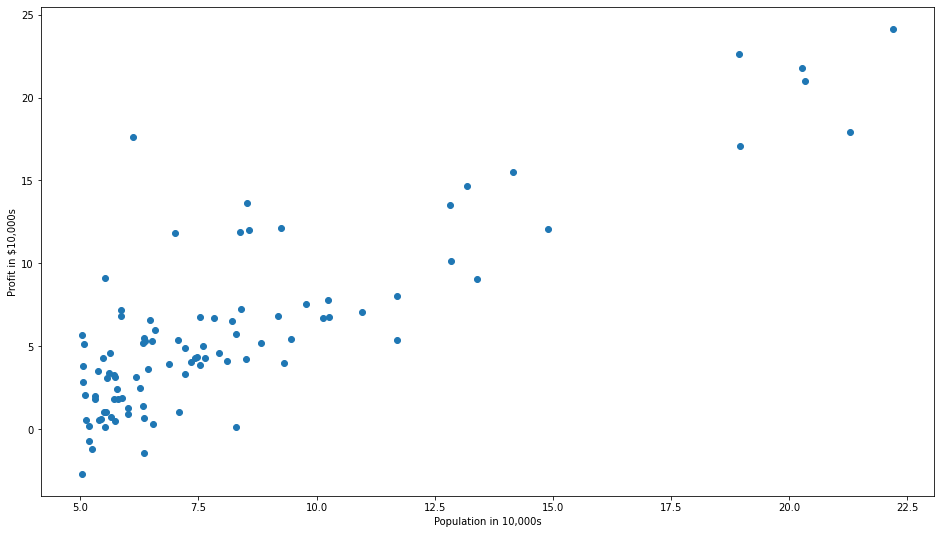

In [45]:
#plot
plt.figure(figsize=(16, 9))
plt.scatter(df.Population, df.Profit)
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

### Function to compute the cost function 

In [46]:
### Function to compute the cost function 

In [47]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*z)
    #inner_product = np.power((np.dot(X, theta) - y) , 2)
    #return np.sum(inner_product) / (2 * len(X))

### Appending 1s to the front of the dataset

In [48]:
#insert column with 1s
df.insert(0, 'New', '1')
df

,New,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


### Set training data (X) and target variable (y)

In [49]:
X = df.iloc[:,1] 
y = df.iloc[:,2]
z = len(y)

### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [50]:
#converting X,y into numpy matrix
X = X[:,np.newaxis]
y = y[:,np.newaxis]
print(X)
print(y)

[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.0594]
 [ 5.7077]

<ipython-input-50-f40bf64647f2>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]
<ipython-input-50-f40bf64647f2>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]


In [51]:
#converting theta into numpy matrix
# take initial values as [0,0] for theta
theta = np.zeros([2,1])
print(theta)

[[0.]
 [0.]]


In [52]:
ones = np.ones((z,1))
X = np.hstack((ones, X))

In [53]:
H=computeCost(X, y, theta)
print(H)

32.072733877455676


### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [54]:
def gradientDescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    for _ in range(iters):
      temp = np.dot(X, theta) - y
      temp = np.dot(X.T, temp)
      theta = theta - (alpha/z) * temp
      #cost[iters] = computeCost(X, y, theta)
    '''temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)'''
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)
        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
    return theta

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [55]:
# take alpha 0.01 
# iters=1000
iters = 1000
alpha = 0.01

In [56]:
theta = gradientDescent(X, y, theta, alpha, iters)
print(theta)

[[-3.24140214]
 [ 1.1272942 ]]


In [57]:
A = computeCost(X, y, theta)
print(A)

4.515955503078913





### Using Matplotlib library to visualize our solution using scatter plot

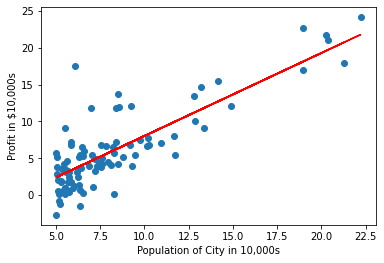

In [58]:
plt.scatter(X[:,1], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1], np.dot(X, theta),c='red')
plt.show()

In [59]:
x = df[['Population']]
y = df[['Profit']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 101)
print(f'Total # of sample in whole dataset: {len(x)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Shape of x_train: {x_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(x_test)}')
print(f'Shape of x_test: {x_test.shape}')

Total # of sample in whole dataset: 97
**************************************************
Total # of sample in train dataset: 64
Shape of x_train: (64, 1)
**************************************************
Total # of sample in test dataset: 33
Shape of x_test: (33, 1)


In [60]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [61]:
print(regressor.coef_, regressor.intercept_)

[[1.13581538]] [-3.6107158]


In [62]:
y_pred = regressor.predict(x_test)

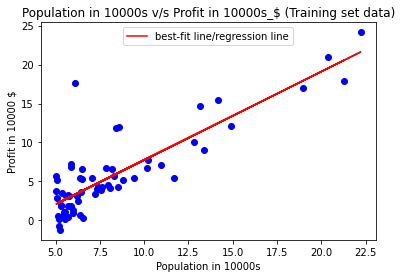

In [63]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, regressor.predict(x_train) , color = 'red',label = 'best-fit line/regression line')
plt.title('Population in 10000s v/s Profit in 10000s_$ (Training set data)')
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000 $')
plt.legend(loc = 'upper center')
plt.show()

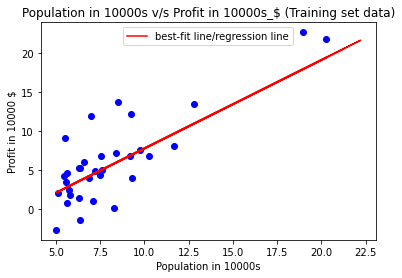

In [64]:
#Visualizing Test set data and Best-fit / regression line
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, regressor.predict(x_train) , color = 'red',label = 'best-fit line/regression line')
plt.title('Population in 10000s v/s Profit in 10000s_$ (Training set data)')
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000 $')
plt.legend(loc = 'upper center')
plt.show()

In [65]:
MAE = skm.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",MAE)

Mean Absolute Error: 2.4583355713550614


In [66]:
MAPE = np.mean(np.abs( (y_test-y_pred) / y_test ))*100
print("Mean Absolute Percentage Error:",np.mean(np.abs( (y_test-y_pred) / y_test))*100)
print("Mean Absolute Percentage Error: ",MAPE)

Mean Absolute Percentage Error: Profit    181.008898
dtype: float64
Mean Absolute Percentage Error:  Profit    181.008898
dtype: float64


In [67]:
MSE = skm.mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",MSE)

Mean Squared Error:  10.765837150752038


In [68]:
RMSE = np.sqrt(skm.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",RMSE)

Root Mean Squared Error: 3.2811335161422552


In [69]:
R2 = skm.r2_score(y_test, y_pred)
print("R^2: ",R2)

n=x_test.shape[0]
p=x_test.shape[1] - 1   # subtract 1 coz test.shape also includes attribute we have to predict

adj_R2 = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: ',adj_R2)

R^2:  0.6585859672651709
Adjusted R Squared:  0.6585859672651709
